## Hacker Statistics using random numbers
* Instead of literally repeating the data collection over and over, we can simulate the repeated measurements using Python

In [1]:
#import sys
#!{sys.executable} -m pip install jupyter_contrib_nbextensions

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# get matplot to show charts inline
%matplotlib inline

np.random.seed(42)

In [3]:
%run bernoulli_trials.ipynb

Let's say a bank issued 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05

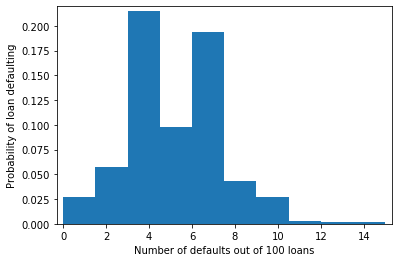

In [4]:
# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)
probability_that_a_loan_will_default = 0.05

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, probability_that_a_loan_will_default)

# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, density=True)
_ = plt.xlabel('Number of defaults out of 100 loans')
_ = plt.ylabel('Probability of loan defaulting')
_ = plt.margins(0.02)

# Show the plot
plt.show()

In [5]:
%run ECDF.ipynb
x, y = compute_ecdf(n_defaults)

# Plot the ECDF with labeled axes
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Number of loan defaults out of 100')
_ = plt.ylabel('ECDF')

# Show the plot
_ = plt.show()

In [6]:
defaults_to_consider = 10
print('With a probability of', probability_that_a_loan_will_default, 'and a threshold of', defaults_to_consider, 
      ',', np.sum(n_defaults >= defaults_to_consider), 'loans out of', len(n_defaults), 'will default') 

With a probability of 0.05 and a threshold of 10 , 22 loans out of 1000 will default


### Probability mass function (PMF)
* A set of probabilities of discrete outcomes

### Binomial distribution
* The number of successes in n Bernoulli trials with the probability of p of success, is Binomially distributed

### The Binomial PMF

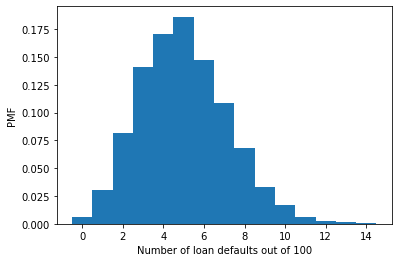

In [7]:
n = 100
p = 0.05
samples = np.random.binomial(n, p, size=10_000)
bins = np.arange(0, max(samples) + 1.5) - 0.5
_ = plt.hist(samples, bins=bins, density=True)
#_ = plt.xlabel('Number of successes')
_ = plt.xlabel('Number of loan defaults out of 100')
_ = plt.ylabel('PMF')
plt.show()

#print(bins)

### Poisson process
The timing of the next event is completely independent of when the previous event happened. E.g. natural births in a given hospital.

### Poisson distribution
* The number r of arrivals in a given time interval with an average rate of ? arrivals per interval is Poisson distributed

Poisson:      10.0145 3.1713545607516043
n = 20 Binom: 10.0592 2.23523944131272
n = 100 Binom: 10.0441 2.9942536949964675
n = 1000 Binom: 10.0129 3.139639085946026


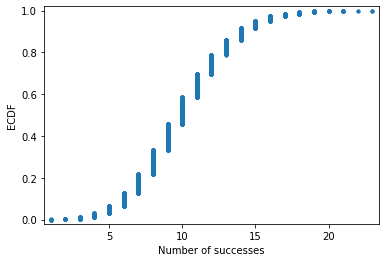

In [8]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, 10_000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson), np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = np.array([20, 100, 1000])
p = np.array([0.5, 0.1, 0.01])

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], 10_000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))
    
x, y = compute_ecdf(samples_poisson)

# Plot the ECDF with labeled axes
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Number of successes')
_ = plt.ylabel('ECDF')
_ = plt.margins(0.02)

# Show the plot
_ = plt.show()

### Probability density function (PDF)
* Continuous analog to the PMF
* The relative likelihood of observing a value of a continuous variable

### Normal distribution
* Describes a continuous variable whose PDF has a single symmetric peak

### Compute theoretical normal distribution

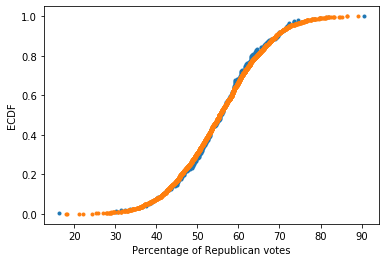

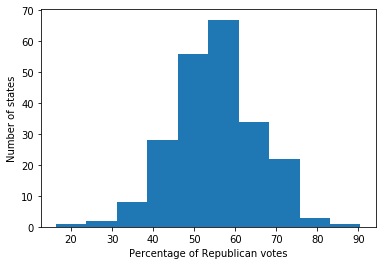

In [9]:
import pandas as pd

df_swing = pd.read_csv('2008_swing_states.csv')
data = df_swing['rep_votes'] / df_swing['total_votes'] * 100
#print(data)
mean = np.mean(data)
sigma = np.std(data)
randomly_created_data = np.random.normal(mean, sigma, len(data) * 10)
#print(randomly_created_data)
#randomly_created_data += abs(min(randomly_created_data)) + min(data)
#randomly_created_data
#theor_mean = np.mean(randomly_created_data)
#theor_sigma = np.std(randomly_created_data)
#print(theor_mean, theor_sigma, mean, sigma)

#min(data)
x, y = compute_ecdf(data)
x_theor, y_theor = compute_ecdf(randomly_created_data)

# Plot the ECDF with labeled axes
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor, marker='.', linestyle='none')
_ = plt.xlabel('Percentage of Republican votes')
_ = plt.ylabel('ECDF')

# Show the plot
_ = plt.show()

_ = plt.hist(data, density=False)
_ = plt.xlabel('Percentage of Republican votes')
_ = plt.ylabel('Number of states')
_ = plt.show()



### Exponential distribution
* The waiting time between arrivals of a Poisson process is exponentially distributed

In [ ]:
np.random.exponential()